# Day-4 Assignment
#### Anbu Ezhilmathi Nambi - E0119053
### simple linear regression model for Salary Dataset

#  Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import the dataset

In [2]:
data = pd.read_csv("Salary_Data.csv")
data.head(10)

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [3]:
data.shape

(30, 2)

In [4]:
X = data.iloc[:,0].values
y = data.iloc[:,-1].values

In [5]:
data.isna().sum() 

YearsExperience    0
Salary             0
dtype: int64

# Visualizing the dataset 

C:\Users\ANBU NAMBI\anaconda3\envs\aiml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

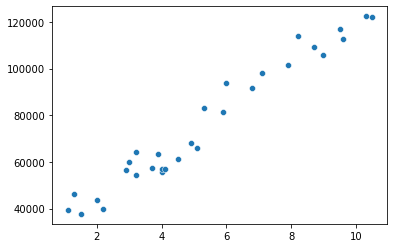

In [6]:
sns.scatterplot(X,y)

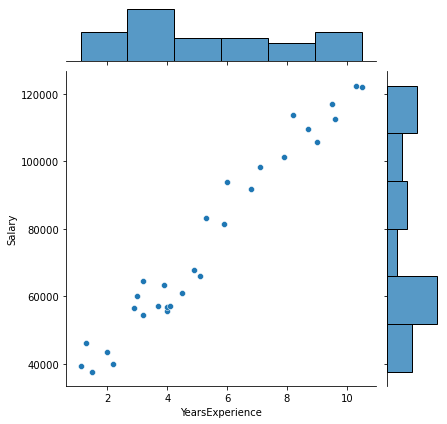

In [7]:
sns.jointplot(data=data,x='YearsExperience',y='Salary')

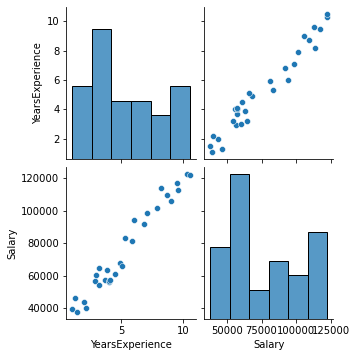

In [8]:
sns.pairplot(data)

# Splitting the dataset into train and test set

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [11]:
model.fit(X_train.reshape(-1,1),y_train)

LinearRegression()

In [12]:
# Slope value
print("m value:",model.coef_)

m value: [9296.17996482]


In [13]:
# Intercept value
print("b value:",model.intercept_)

b value: 27258.959683832567


# Visualization of test results

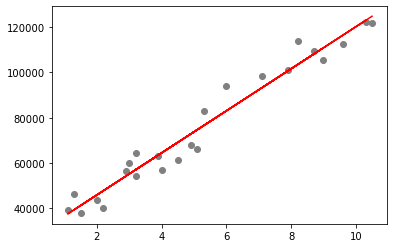

In [14]:
# Regression plot for trained data
plt.scatter(X_train.reshape(1,-1),y_train.reshape(1,-1),color="gray")
plt.plot(X_train.reshape(-1,1),model.predict(X_train.reshape(-1,1)),color="red")

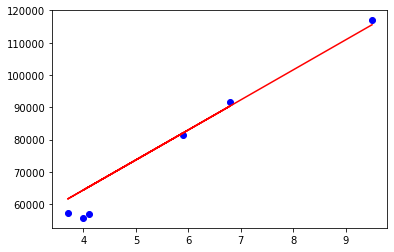

In [15]:
# Regression plot for test data
plt.scatter(X_test,y_test,color="blue")
plt.plot(X_test.reshape(-1,1),model.predict(X_test.reshape(-1,1)),color="red")

In [16]:
#Find b and m using least squares method
def linearregression(X_train,y_train):
    x= X_train
    y= y_train
    xy_sum=0
    x_sq=x*x      
    for i in range(len(x)):
        xy_sum+=(x[i]*y[i])
             
    sum_x_y=sum(x)*sum(y)
    x_sqsum= x_sq.sum() 
    x_sum_sq= x.sum()*x.sum()
    n= len(x)
    m= (n*xy_sum-sum_x_y)/(n*x_sqsum-x_sum_sq)
    y_sum = y.sum()
    x_sum= x.sum()
    
    b=(y_sum- (m*x_sum))/len(x)
    return m,b

In [17]:
linearregression(X_train,y_train)

(9296.17996481673, 27258.959683832585)

# Evaluate the model

In [18]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

# Evaluation of metrics for train data

In [19]:
mean_absolute_error(y_train,model.predict(X_train.reshape(-1,1)))

4856.783283530538

In [20]:
# Mean squared error
mse=mean_squared_error(y_train,model.predict(X_train.reshape(-1,1)))
mse

32862012.42667143

In [21]:
# Root mean squared error
np.sqrt(mse)

5732.5397884944

In [22]:
# Coefficient of determination 
r2_score(y_train,model.predict(X_train.reshape(-1,1)))

0.957867699281127

# Evaluating regression metrics for test data

In [23]:
mean_absolute_error(y_test,model.predict(X_test.reshape(-1,1)))

4135.428553068094

In [24]:
# Mean squared error
mse=mean_squared_error(y_test,model.predict(X_test.reshape(-1,1)))
mse

27937572.370170638

In [25]:
# Root mean squared error
np.sqrt(mse)

5285.6004739452865

In [26]:
# Coefficient of determination 
r2_score(y_test,model.predict(X_test.reshape(-1,1)))

0.9454365917145018

#### the r-square value is 97% high for the test set. This indicates a better fit for the model 